In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
import joblib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_low_dim = pd.read_csv("Processed_Data_Lower_Dim_Fixed.csv")

In [4]:
X_lowdim = df_low_dim.drop(["Market_Value","TransfermarktId","Name","Season_Name","club_contract_valid_until_year","nationality_id","nationality_name","value_eur","Old_Club","New_Club","club_name","body_type"], axis=1)  
y_lowdim = df_low_dim['Market_Value']  

In [ ]:
X_train, y_train,X_test, y_test = train_test_split(X_lowdim, y_lowdim, test_size=0.2, random_state=30)  # 40% for temp

In [56]:
total_estimators = 200
max_depth=150
rf_regressor = RandomForestRegressor(n_estimators=total_estimators, warm_start=True, random_state=30,verbose=1, max_depth = max_depth)
# Track progress
with tqdm(total=total_estimators, desc="Training Progress") as pbar:
    for i in range(1, total_estimators + 1):
        rf_regressor.set_params(n_estimators=i)  # Incrementally add trees
        rf_regressor.fit(X_lowdim, y_lowdim)      # Train the model
        pbar.update(1)  
y_val_pred = rf_regressor.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"R² Score: {val_r2:.2f}")


Training Progress: 100%|██████████| 200/200 [05:56<00:00,  1.78s/it]
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Validation Metrics:
Mean Squared Error (MSE): 2494701455506.98
Mean Absolute Error (MAE): 479814.78
R² Score: 0.91


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s


In [ ]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1,verbose=True)  # Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)
y_test_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

In [59]:
y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"R² Score: {test_r2:.2f}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Validation Metrics:
Mean Squared Error (MSE): 2837782902897.57
Mean Absolute Error (MAE): 507656.88
R² Score: 0.90


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s


In [17]:
results = pd.DataFrame(results)

In [21]:
results.iloc[:,[2]]

,2
0,0.735025
1,0.834181
2,0.862888
3,0.875466
4,0.885842
...,...
195,0.911505
196,0.911348
197,0.911323
198,0.911220


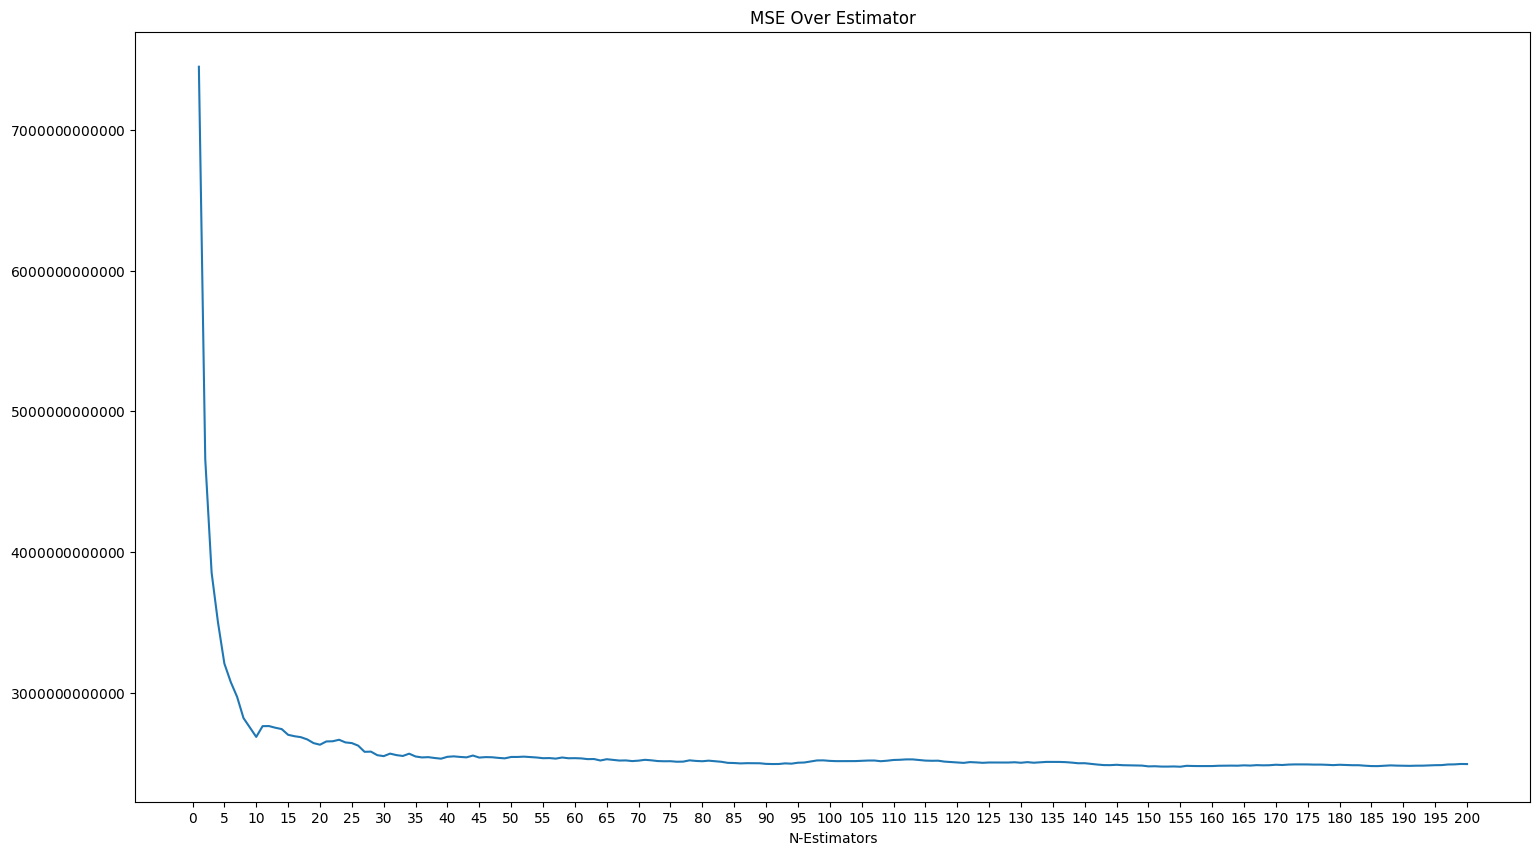

In [51]:
plt.figure(figsize=(18,10))
plt.plot(range(1,201),results.iloc[:,[0]])
plt.xticks(np.arange(0, 202, step=5)) # X ekseninde 1 birimlik aralıklarla işaretler
plt.title("MSE Over Estimator")
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))
plt.ticklabel_format(style='plain', axis='y')  # Ensure plain style
plt.xlabel("N-Estimators")
plt.savefig("Random Forest Performance_MSE.png")
plt.show()

Text(157.09722222222223, 0.5, 'N-Estimators')

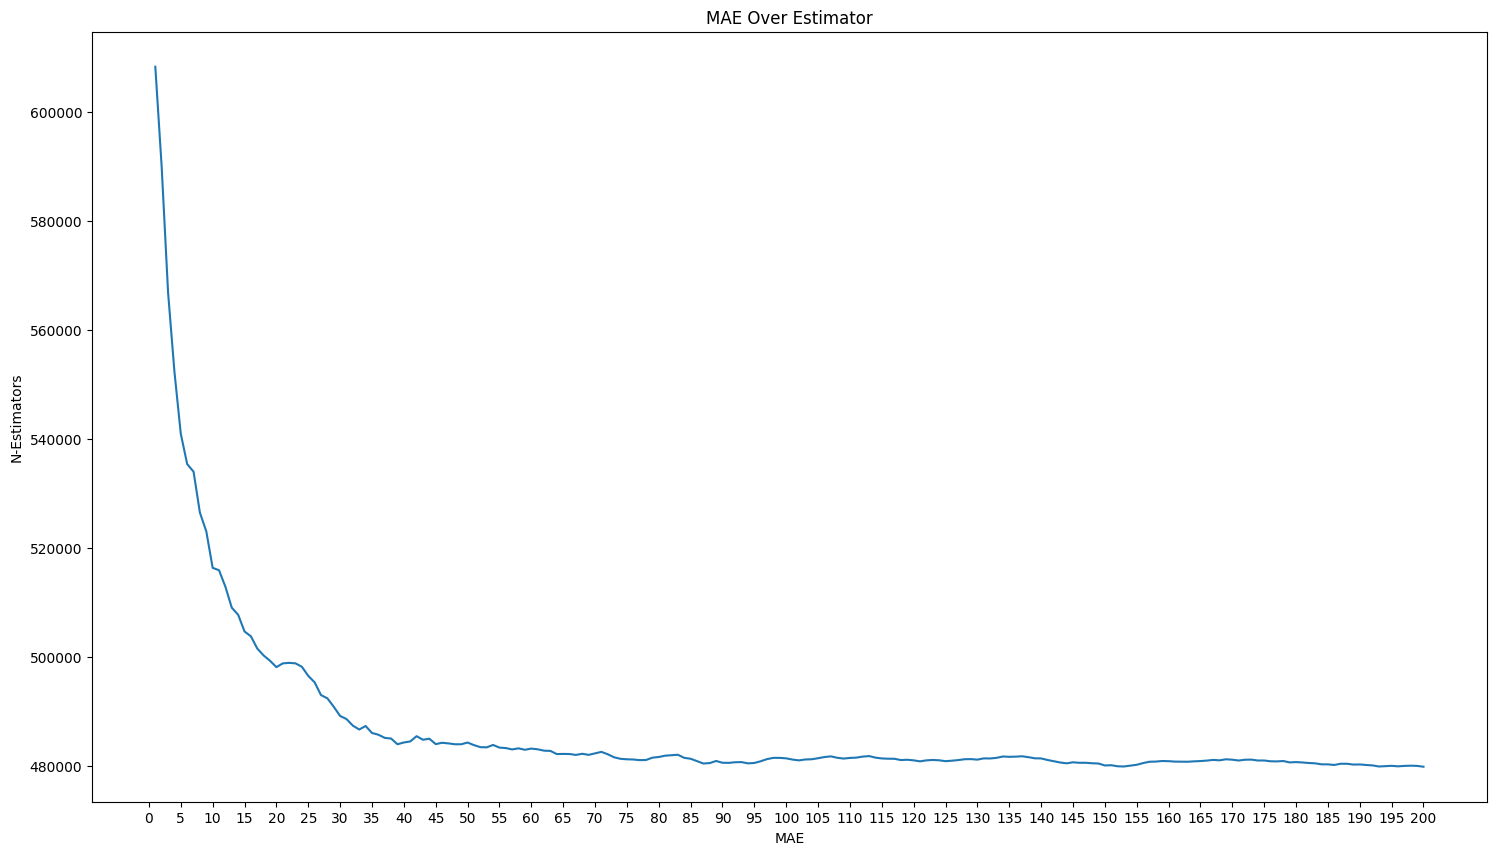

In [42]:
plt.figure(figsize=(18,10))
plt.plot(range(1,201),results.iloc[:,[1]])
plt.xticks(np.arange(0, 202, step=5)) # X ekseninde 1 birimlik aralıklarla işaretler
plt.title("MAE Over Estimator")
plt.xlabel("MAE")
plt.savefig("Random Forest Performance_MAE.png")
plt.ylabel("N-Estimators")

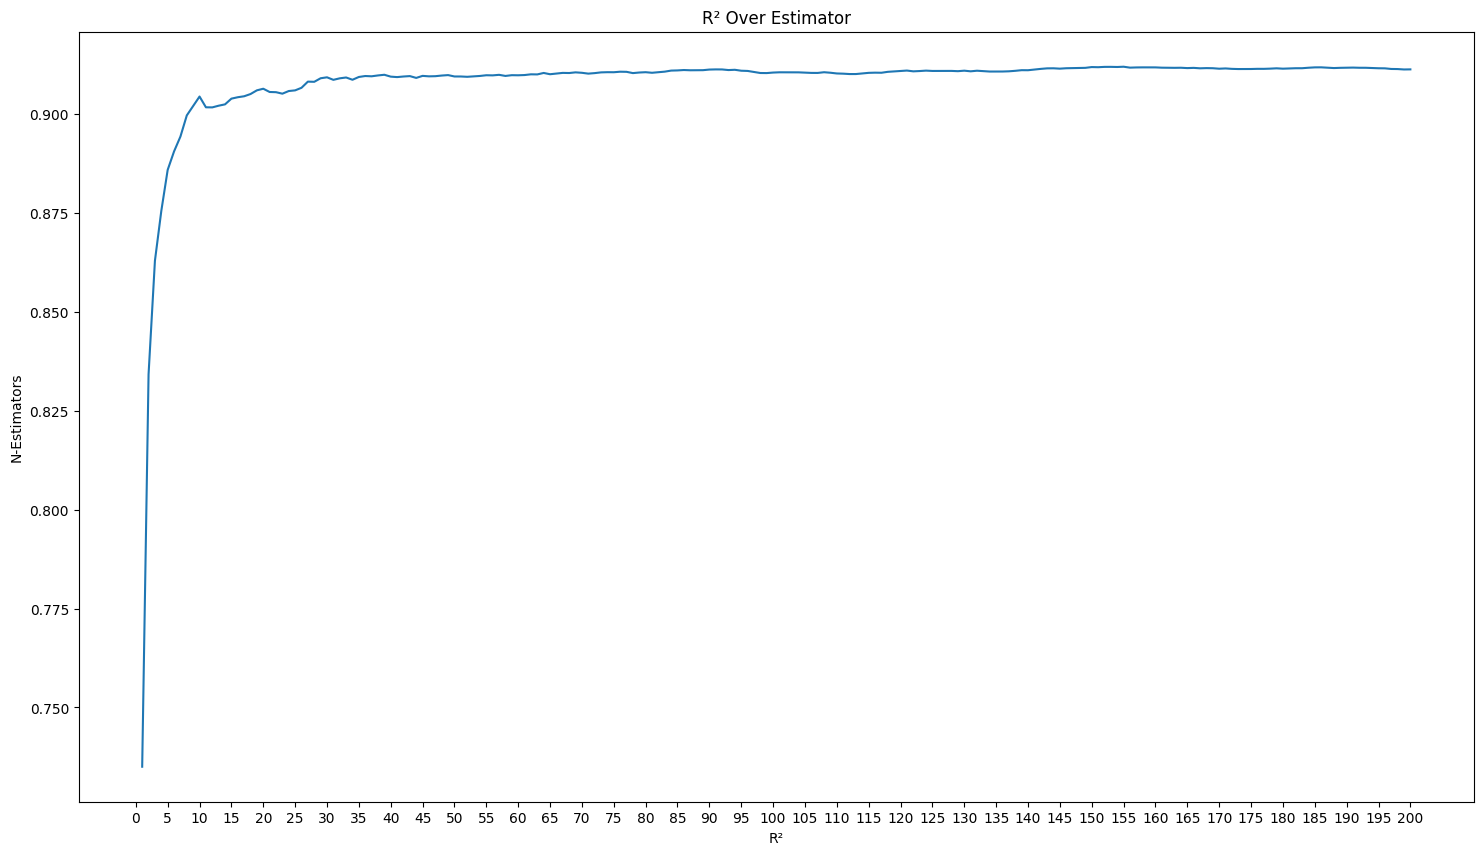

In [41]:
plt.figure(figsize=(18,10))
plt.plot(range(1,201),results.iloc[:,[2]])
plt.xticks(np.arange(0, 202, step=5)) # X ekseninde 1 birimlik aralıklarla işaretler
plt.title("R² Over Estimator")
plt.xlabel("R²")
plt.ylabel("N-Estimators")
plt.savefig("Random Forest Performance_R2.png")
plt.show()

In [14]:
total_estimators = 200
max_depth=150
rf_regressor = RandomForestRegressor(n_estimators=total_estimators, warm_start=True, random_state=30,verbose=1, max_depth = max_depth)
# Track progress
with tqdm(total=total_estimators, desc="Training Progress") as pbar:
    for i in range(1, total_estimators + 1):
        rf_regressor.set_params(n_estimators=i)  # Incrementally add trees
        rf_regressor.fit(X_lowdim, y_lowdim)      # Train the model
        pbar.update(1)  

Training Progress: 100%|██████████| 200/200 [05:38<00:00,  1.69s/it]


In [ ]:
y_val_pred = rf_regressor.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"R² Score: {val_r2:.2f}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Validation Metrics:
Mean Squared Error (MSE): 4024731155817.30
Mean Absolute Error (MAE): 524914.42
R² Score: 0.87


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.9s


In [15]:
total_estimators = 400
max_depth=200
rf_regressor = RandomForestRegressor(n_estimators=total_estimators, warm_start=True, random_state=30,verbose=1, max_depth = max_depth)
# Track progress
with tqdm(total=total_estimators, desc="Training Progress") as pbar:
    for i in range(1, total_estimators + 1):
        rf_regressor.set_params(n_estimators=i)  # Incrementally add trees
        rf_regressor.fit(X_train_2, y_train_2)      # Train the model
        pbar.update(1)  

Training Progress: 100%|██████████| 400/400 [07:37<00:00,  1.14s/it]


In [17]:
y_val_pred = rf_regressor.predict(X_test_2)
val_mse = mean_squared_error(y_test_2, y_val_pred)
val_mae = mean_absolute_error(y_test_2, y_val_pred)
val_r2 = r2_score(y_test_2, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"R² Score: {val_r2:.2f}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s


Validation Metrics:
Mean Squared Error (MSE): 12785782297711.02
Mean Absolute Error (MAE): 1067429.07
R² Score: 0.62


In [ ]:
# Fit the model


[LibSVM]

SVR(verbose=True)

In [65]:
svr_results = []

In [66]:
y_test_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

Validation Metrics:
Mean Squared Error (MSE): 29470719285582.32
Mean Absolute Error (MAE): 1913807.85
R² Score: -0.08


In [67]:
svr = SVR(kernel='rbf', C=10.0, epsilon=0.1,verbose=True)  # Radial Basis Function (RBF) kernel

In [69]:
svr.fit(X_train, y_train)

[LibSVM]

SVR(C=10.0, verbose=True)

In [70]:
y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

Validation Metrics:
Mean Squared Error (MSE): 30398977188128.63
Mean Absolute Error (MAE): 1921975.23
R² Score: -0.08


In [71]:
svr = SVR(kernel='rbf', C=50.0, epsilon=0.1,verbose=True)  # Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)

[LibSVM]

SVR(C=50.0, verbose=True)

In [72]:
y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

Validation Metrics:
Mean Squared Error (MSE): 30387416988346.03
Mean Absolute Error (MAE): 1915901.91
R² Score: -0.08


In [73]:
svr = SVR(kernel='rbf', C=100.0, epsilon=0.1,verbose=True)  # Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)

[LibSVM]

SVR(C=100.0, verbose=True)

In [74]:
y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

Validation Metrics:
Mean Squared Error (MSE): 30324980783085.35
Mean Absolute Error (MAE): 1908836.25
R² Score: -0.08


In [75]:
svr = SVR(kernel='rbf', C=10.0, epsilon=1,verbose=True)  # Radial Basis Function (RBF) kernel

In [76]:
svr.fit(X_train, y_train)

[LibSVM]

SVR(C=10.0, epsilon=1, verbose=True)

In [77]:
y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

Validation Metrics:
Mean Squared Error (MSE): 30398977188128.63
Mean Absolute Error (MAE): 1921975.23
R² Score: -0.08


In [78]:
svr = SVR(kernel='rbf', C=10.0, epsilon=10,verbose=True)  # Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)

[LibSVM]

SVR(C=10.0, epsilon=10, verbose=True)

In [79]:
y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

Validation Metrics:
Mean Squared Error (MSE): 30398977188128.63
Mean Absolute Error (MAE): 1921975.23
R² Score: -0.08


In [80]:
svr = SVR(kernel='rbf', C=10.0, epsilon=10000,verbose=True)  # Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)

[LibSVM]

SVR(C=10.0, epsilon=10000, verbose=True)

In [81]:
y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

Validation Metrics:
Mean Squared Error (MSE): 30425953474716.54
Mean Absolute Error (MAE): 1922015.08
R² Score: -0.08


In [83]:
svr = SVR(kernel='poly', C=10.0, epsilon=0.1,verbose=True)  # Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)

[LibSVM]

SVR(C=10.0, kernel='poly', verbose=True)

In [84]:
y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

Validation Metrics:
Mean Squared Error (MSE): 30312191181520.37
Mean Absolute Error (MAE): 1909827.36
R² Score: -0.08


In [89]:
scaler = MinMaxScaler()

In [91]:
y_lowdim

0        3000000
1        3000000
2        2400000
3        2800000
4        2500000
          ...   
44859     150000
44860     150000
44861     400000
44862     150000
44863     100000
Name: Market_Value, Length: 44864, dtype: int64

In [109]:
y_lowdim.values

array([3000000, 3000000, 2400000, ...,  400000,  150000,  100000])

In [114]:
y_lowdim_normalized = scaler.fit_transform(y_lowdim.to_frame().T)

In [ ]:
y_lowdim_normalized[]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [85]:
svr = SVR(kernel='linear', C=10.0, epsilon=0.1,verbose=True)  # Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)

y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

[LibSVM]Validation Metrics:
Mean Squared Error (MSE): 30289936587686.64
Mean Absolute Error (MAE): 1905530.45
R² Score: -0.08


In [119]:
y_lowdim_normalized = scaler.fit_transform(df_low_dim[['Market_Value']])
X_train, X_temp, y_train, y_temp = train_test_split(X_lowdim, y_lowdim_normalized, test_size=0.4, random_state=30)  # 40% for temp
X_val, X_test, y_val_normalized, y_test_normalized = train_test_split(X_temp, y_temp, test_size=0.5, random_state=30)  # Split temp 50-50

In [120]:
svr = SVR(kernel='linear', C=10.0, epsilon=0.1,verbose=True)  # Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)

y_val_pred = svr.predict(X_val)
mse = mean_squared_error(y_val_normalized, y_val_pred)
mae = mean_absolute_error(y_val_normalized, y_val_pred)
r2 = r2_score(y_val_normalized, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
svr_results.append([mse,mae,r2])

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]Validation Metrics:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R² Score: -1.86


In [125]:
y_val_pred = svr.predict(X_val.iloc[[2],:])

In [126]:
y_val_pred

array([0.07073807])

In [127]:
y_val_normalized

array([[0.009934  ],
       [0.00493366],
       [0.00560037],
       ...,
       [0.01660111],
       [0.00126675],
       [0.00326688]])

In [ ]:
svr = SVR(kernel='rbf', C=20.0, epsilon=0.1,verbose=True)  # Radial Basis Function (RBF) kernel

In [129]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Validation Metrics:
Mean Squared Error (MSE): 33228894379391.52
Mean Absolute Error (MAE): 2263167.60
R² Score: -0.18


In [137]:
k_neighbors = 1000
model = KNeighborsRegressor(n_neighbors=k_neighbors)

model.fit(X_train, y_train)

y__val_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y__val_pred) 
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y__val_pred)  

In [139]:
mae

np.float64(2263167.599003707)

Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851 0.01745109 0.01675884
 0.01530961 0.01439034 0.0140534  0.01375    0.01361296 0.01306626
 0.01256225 0.01170748 0.01135635 0.01095803 0.00999732 0.00964622
 0.00918087 0.00874553 0.00851657 0.00826198 0.00808028 0.00793848
 0.00773869 0.00745639 0.00733639 0.00684105 0.00672031 0.00647621
 0.00632241 0.00623006 0.00607357 0.00596327 0.00587316 0.00560465
 0.00543245 0.00520552 0.00511847 0.00506818 0.00487772 0.00478572
 0.00469971 0.00463562 0.00446817 0.00427804 0.00419087 0.00416103
 0.00398338 0.00375304 0.00367838 0.00357605 0.00334184 0.00331431
 0.00315938 0.00297178 0.00290474 0.00285797 0.00274975 0.00271754
 0.00257843 0.00252806 0.00248381 0.00237599]


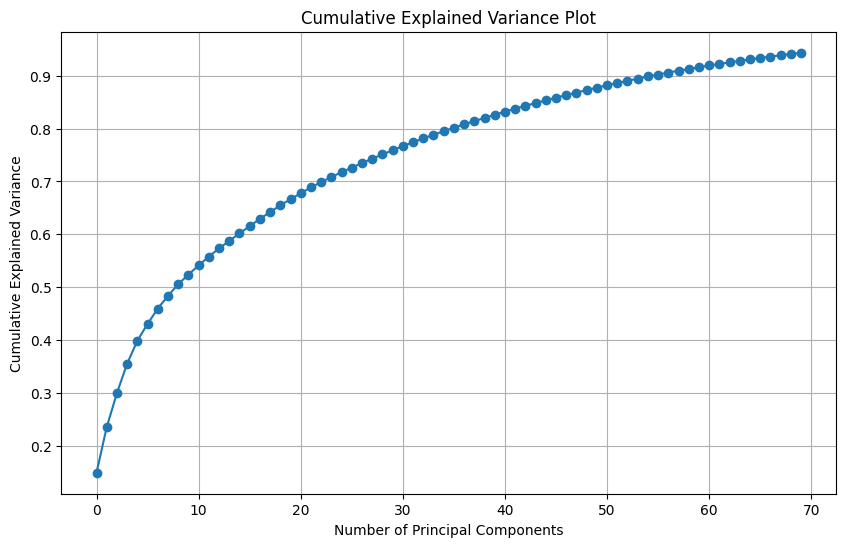

In [160]:
n_components = 70  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()


In [142]:
X_pca

array([[ 7.29488463e-01, -1.59028239e-01,  5.25332817e-01, ...,
         2.63922572e-02, -7.69267903e-02, -1.41265691e-02],
       [-6.48761379e-01,  3.11349691e-02,  4.80288130e-01, ...,
         7.89864751e-02, -6.31776661e-02, -6.27991233e-02],
       [-7.33911451e-01, -2.02164724e-01,  6.73576734e-01, ...,
         4.94644055e-02, -1.71788467e-01, -6.43247205e-04],
       ...,
       [-4.55362175e-01, -4.55004245e-01, -7.09984909e-01, ...,
         1.26623334e-01, -1.07222385e-01,  1.19355833e-01],
       [-4.89998160e-01, -3.49313463e-01, -2.71432333e-01, ...,
         4.64779204e-01, -1.61399881e-01,  2.77560281e-01],
       [-1.03698617e+00, -1.31414997e+00, -2.40315529e-01, ...,
         2.75834263e-02, -1.38276393e-01,  7.58053668e-02]])

In [146]:
X_train.shape

(26918, 133)

In [144]:
X_pca.shape

(8973, 40)

In [145]:
y_train.shape

(26918, 1)

In [163]:
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_pca, y_lowdim, test_size=0.4, random_state=30)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=30)

In [164]:
knn_results = []

for k_neighbors in tqdm(range(1,31)):
    model = KNeighborsRegressor(n_neighbors=k_neighbors)

    model.fit(X_train_pca, y_train_pca)

    y_val_pred = model.predict(X_val_pca)

    mse = mean_squared_error(y_val_pca, y_val_pred)
    mae = mean_absolute_error(y_val_pca, y_val_pred)
    r2 = r2_score(y_val_pca, y_val_pred)
    knn_results.append([mse,mae,r2])
    

100%|██████████| 30/30 [00:11<00:00,  2.53it/s]


In [165]:
knn_results = pd.DataFrame(knn_results)

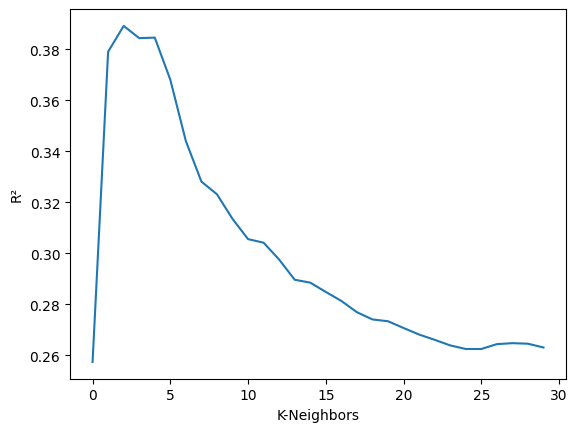

In [170]:
plt.plot(knn_results[2])
plt.ylabel("R²")
plt.xlabel("K-Neighbors")
plt.savefig("knn_result_r2_70pca")

Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851 0.01745109 0.01675884
 0.01530961 0.01439034 0.0140534  0.01375    0.01361296 0.01306626
 0.01256225 0.01170748 0.01135635 0.01095803 0.00999732 0.00964622
 0.00918087 0.00874553 0.00851657 0.00826198 0.00808028 0.00793848
 0.00773869 0.00745639 0.00733639 0.00684105 0.00672031 0.00647621
 0.00632241 0.00623006 0.00607357 0.00596327 0.00587316 0.00560465
 0.00543245 0.00520552 0.00511847 0.00506818 0.00487772 0.00478572
 0.00469971 0.00463562 0.00446817 0.00427804 0.00419087 0.00416103
 0.00398338 0.00375304 0.00367838 0.00357605 0.00334184 0.00331431]


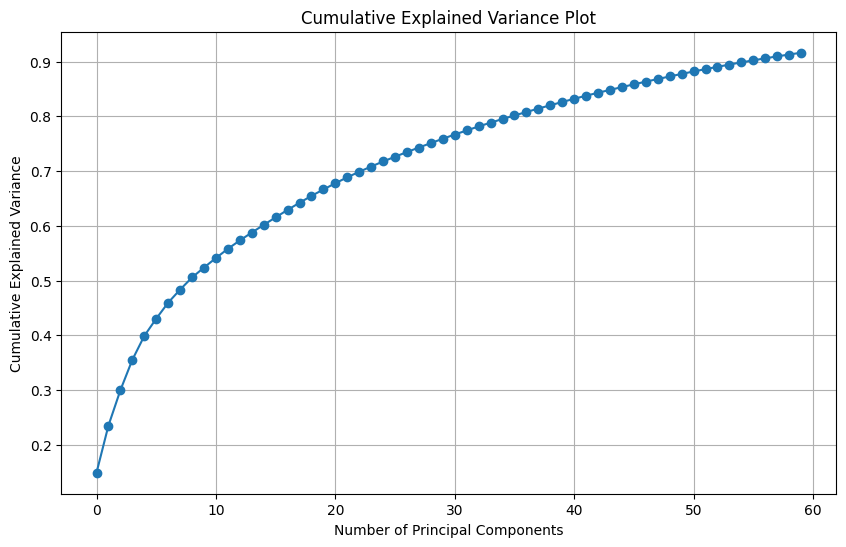

100%|██████████| 30/30 [00:09<00:00,  3.10it/s]


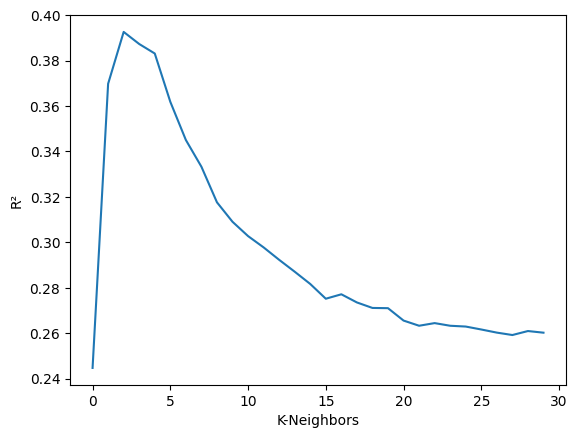

In [ ]:
n_components = 60  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_pca, y_lowdim, test_size=0.4, random_state=30)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=30)
knn_results = []

for k_neighbors in tqdm(range(1,31)):
    model = KNeighborsRegressor(n_neighbors=k_neighbors)

    model.fit(X_train_pca, y_train_pca)

    y_val_pred = model.predict(X_val_pca)

    mse = mean_squared_error(y_val_pca, y_val_pred)
    mae = mean_absolute_error(y_val_pca, y_val_pred)
    r2 = r2_score(y_val_pca, y_val_pred)
    knn_results.append([mse,mae,r2])
knn_results = pd.DataFrame(knn_results)
plt.plot(knn_results[2])
plt.ylabel("R²")
plt.xlabel("K-Neighbors")
plt.savefig("knn_result_r2_60pca")

Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851 0.01745109 0.01675884
 0.01530961 0.01439034 0.0140534  0.01375    0.01361296 0.01306626
 0.01256225 0.01170748 0.01135635 0.01095803 0.00999732 0.00964622
 0.00918087 0.00874553 0.00851657 0.00826198 0.00808028 0.00793848
 0.00773869 0.00745639 0.00733639 0.00684105 0.00672031 0.00647621
 0.00632241 0.00623006 0.00607357 0.00596327 0.00587316 0.00560465
 0.00543245 0.00520552 0.00511847 0.00506818 0.00487772 0.00478572
 0.00469971 0.00463562]


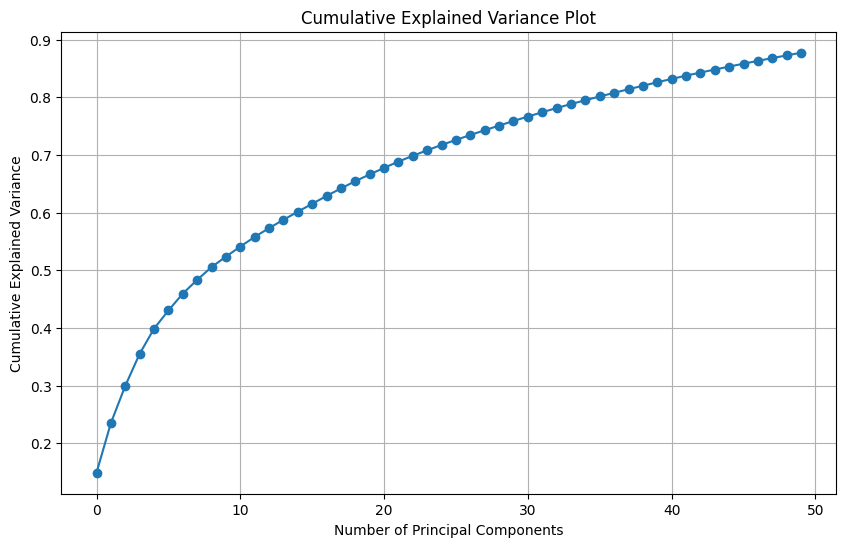

100%|██████████| 30/30 [00:09<00:00,  3.18it/s]


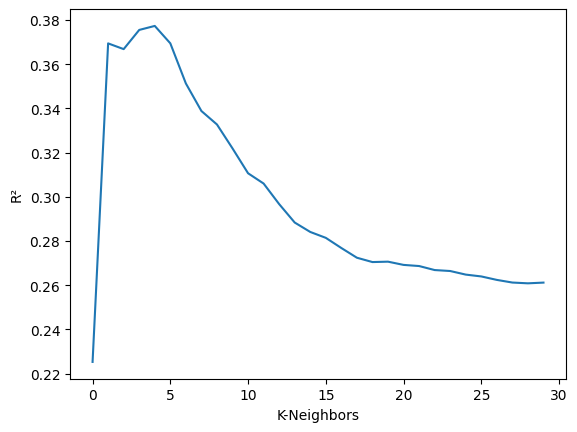

In [173]:
n_components = 50  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_pca, y_lowdim, test_size=0.4, random_state=30)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=30)
knn_results = []

for k_neighbors in tqdm(range(1,31)):
    model = KNeighborsRegressor(n_neighbors=k_neighbors)

    model.fit(X_train_pca, y_train_pca)

    y_val_pred = model.predict(X_val_pca)

    mse = mean_squared_error(y_val_pca, y_val_pred)
    mae = mean_absolute_error(y_val_pca, y_val_pred)
    r2 = r2_score(y_val_pca, y_val_pred)
    knn_results.append([mse,mae,r2])
knn_results = pd.DataFrame(knn_results)
plt.plot(knn_results[2])
plt.ylabel("R²")
plt.xlabel("K-Neighbors")
plt.savefig("knn_result_r2_50pca")

In [6]:
n_components = 40  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_pca, y_lowdim, test_size=0.4, random_state=30)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=30)
knn_results = []

for k_neighbors in tqdm(range(1,31)):
    model = KNeighborsRegressor(n_neighbors=k_neighbors)

    model.fit(X_train_pca, y_train_pca)

    y_val_pred = model.predict(X_val_pca)

    mse = mean_squared_error(y_val_pca, y_val_pred)
    mae = mean_absolute_error(y_val_pca, y_val_pred)
    r2 = r2_score(y_val_pca, y_val_pred)
    knn_results.append([mse,mae,r2])
knn_results = pd.DataFrame(knn_results)
plt.plot(knn_results[2])
plt.ylabel("R²")
plt.xlabel("K-Neighbors")
plt.savefig("knn_result_r2_40pca")

NameError: name 'PCA' is not defined

Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851 0.01745109 0.01675884
 0.01530961 0.01439034 0.0140534  0.01375    0.01361296 0.01306626
 0.01256225 0.01170748 0.01135635 0.01095803 0.00999732 0.00964622
 0.00918087 0.00874553 0.00851657 0.00826198 0.00808028 0.00793848]


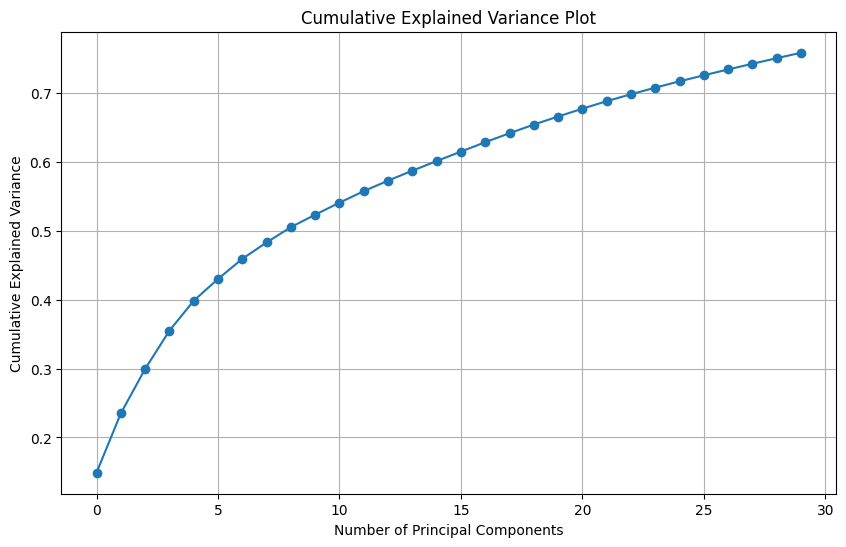

100%|██████████| 30/30 [00:10<00:00,  2.93it/s]


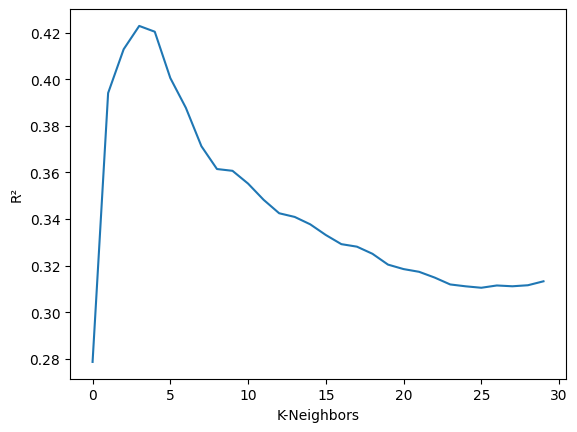

In [ ]:
n_components = 30  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_lowdim, test_size=0.2, random_state=30)
knn_results = []

for k_neighbors in tqdm(range(1,31)):
    model = KNeighborsRegressor(n_neighbors=k_neighbors)

    model.fit(X_train_pca, y_train_pca)

    y_test_pred = model.predict(X_test_pca)

    mse = mean_squared_error(y_test_pca, y_test_pred)
    mae = mean_absolute_error(y_test_pca, y_test_pred)
    r2 = r2_score(y_test_pca, y_test_pred)
    knn_results.append([mse,mae,r2])
knn_results = pd.DataFrame(knn_results)
plt.plot(knn_results[2])
plt.ylabel("R²")
plt.xlabel("K-Neighbors")
plt.savefig("knn_result_r2_40pca")

Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851]


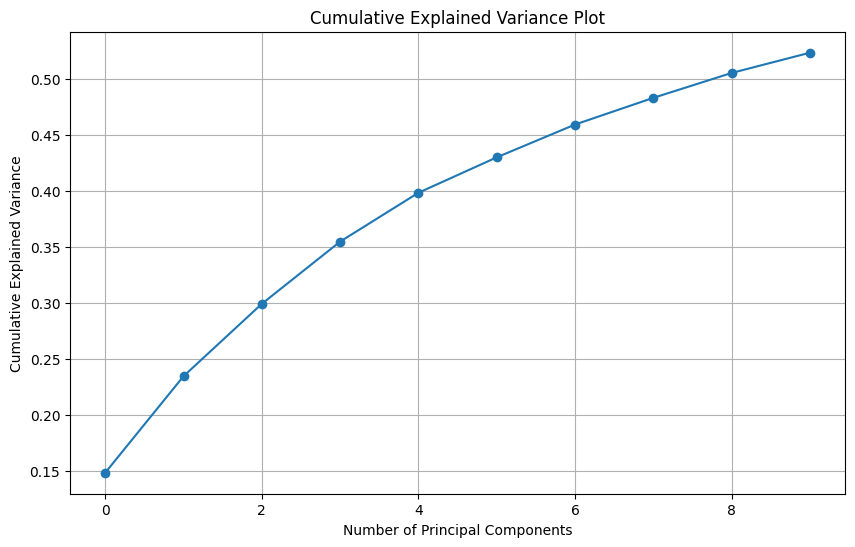

100%|██████████| 30/30 [00:11<00:00,  2.52it/s]


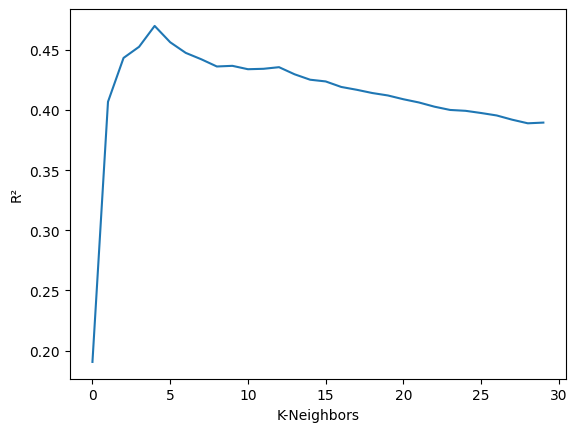

In [ ]:
n_components = 10  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_lowdim, test_size=0.2, random_state=30)
knn_results = []

for k_neighbors in tqdm(range(1,31)):
    model = KNeighborsRegressor(n_neighbors=k_neighbors)

    model.fit(X_train_pca, y_train_pca)

    y_test_pred = model.predict(X_test_pca)

    mse = mean_squared_error(y_test_pca, y_test_pred)
    mae = mean_absolute_error(y_test_pca, y_test_pred)
    r2 = r2_score(y_test_pca, y_test_pred)
    knn_results.append([mse,mae,r2])
knn_results = pd.DataFrame(knn_results)
plt.plot(knn_results[2])
plt.ylabel("R²")
plt.xlabel("K-Neighbors")
plt.savefig("knn_result_r2_10pca")

In [11]:
knn_results

,0,1,2
0,1.998058e+13,1.362500e+06,0.190636
1,1.464273e+13,1.371114e+06,0.406859
2,1.374319e+13,1.411949e+06,0.443297
3,1.351457e+13,1.459004e+06,0.452558
4,1.308648e+13,1.492500e+06,0.469899
5,1.342146e+13,1.522755e+06,0.456330
6,1.363962e+13,1.548935e+06,0.447493
7,1.377073e+13,1.568327e+06,0.442182
8,1.391872e+13,1.581927e+06,0.436187
9,1.390542e+13,1.588690e+06,0.436726


Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851 0.01745109 0.01675884
 0.01530961 0.01439034 0.0140534  0.01375    0.01361296 0.01306626
 0.01256225 0.01170748 0.01135635 0.01095803 0.00999732 0.00964622
 0.00918087 0.00874553 0.00851657 0.00826198 0.00808028 0.00793848
 0.00773869 0.00745639 0.00733639 0.00684105 0.00672031 0.00647621
 0.00632241 0.00623006 0.00607357 0.00596327 0.00587316 0.00560465
 0.00543245 0.00520552 0.00511847 0.00506818 0.00487772 0.00478572
 0.00469971 0.00463562 0.00446817 0.00427804 0.00419087 0.00416103
 0.00398338 0.00375304 0.00367838 0.00357605 0.00334184 0.00331431
 0.00315938 0.00297178 0.00290474 0.00285797 0.00274975 0.00271754
 0.00257843 0.00252806 0.00248381 0.00237599]


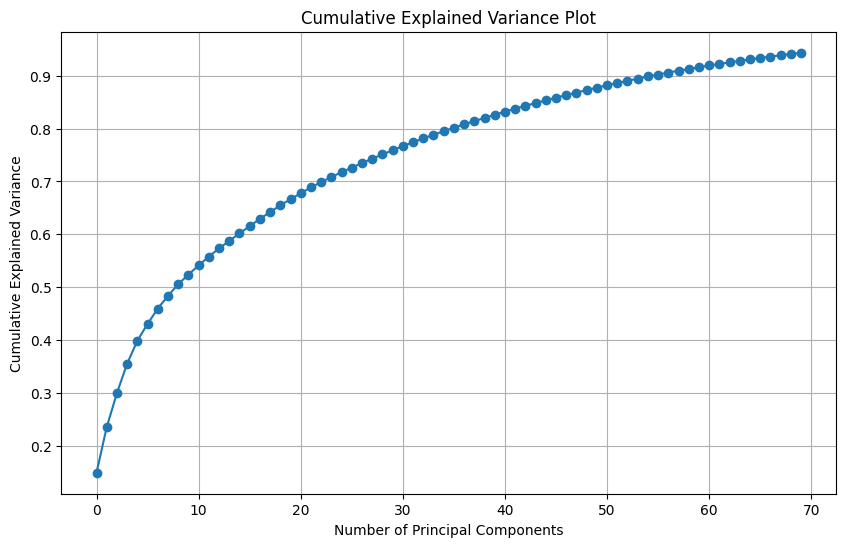

In [181]:
n_components = 70  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_lowdim, test_size=0.2, random_state=30)

In [182]:
model = LinearRegression()
model.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred)
mae = mean_absolute_error(y_test_pca, y_pred)
r2 = r2_score(y_test_pca, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Coefficients: [-7.65157426e+05 -2.06332494e+06 -1.47443228e+05  1.58346411e+06
 -2.18418261e+06 -1.54031151e+06  1.02304121e+06  3.65320320e+05
 -2.93296019e+06  1.56351523e+06 -6.37045841e+05 -3.98468578e+04
 -1.10295109e+06  6.47611880e+05 -7.81954536e+05  3.46980645e+05
  3.80055938e+05 -2.35231518e+06  2.87679588e+06 -4.13076825e+05
 -1.16983178e+05  3.58802521e+05 -1.52528029e+06 -1.92845242e+06
  4.92757017e+05 -2.87077228e+05 -1.54114190e+06 -2.56191548e+05
  1.12905326e+05 -1.04897239e+06  2.08757096e+05 -1.00081573e+06
 -1.67654438e+05  4.04564461e+05 -1.56660989e+06 -1.62245766e+06
  1.18786113e+06  1.08289086e+05 -2.94442974e+04 -4.14839246e+02
 -9.17692173e+05  5.41957855e+05  1.47596210e+06  5.08996142e+04
 -1.22990875e+05  7.41023268e+05  3.34351835e+05 -1.48352941e+06
  6.86763741e+05  3.06339592e+04  1.82122049e+05  7.81767046e+05
  2.01953395e+05  2.82562233e+05  2.26494746e+06  1.99657401e+05
  2.05884807e+06  3.03957692e+05  1.54596877e+06 -1.41208270e+06
  2.1435683

Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851 0.01745109 0.01675884
 0.01530961 0.01439034 0.0140534  0.01375    0.01361296 0.01306626
 0.01256225 0.01170748 0.01135635 0.01095803 0.00999732 0.00964622
 0.00918087 0.00874553 0.00851657 0.00826198 0.00808028 0.00793848
 0.00773869 0.00745639 0.00733639 0.00684105 0.00672031 0.00647621
 0.00632241 0.00623006 0.00607357 0.00596327 0.00587316 0.00560465
 0.00543245 0.00520552 0.00511847 0.00506818 0.00487772 0.00478572
 0.00469971 0.00463562]


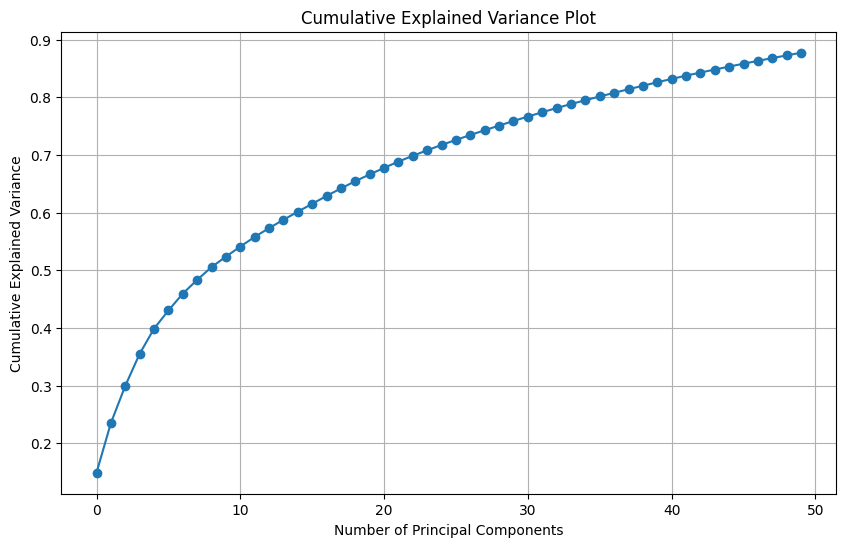

Coefficients: [ -769591.69620372 -2054281.75823307  -156341.82077469  1576552.84007074
 -2184372.01435412 -1545437.54925327  1023426.83848665   366600.72848778
 -2931387.44756773  1561019.69293066  -639827.66470795   -35597.37647233
 -1102504.10082641   655260.84891772  -784706.24070329   349677.01730589
   390303.23216421 -2353035.33330478  2874403.10367545  -410967.73320839
  -127917.26182758   355102.71235099 -1525229.84998784 -1933214.88302024
   510696.25215315  -300219.52335258 -1546412.83122649  -242453.75738034
   121405.5120297  -1056966.6298692    219936.38229592  -985636.07182446
  -153034.12968019   395382.54399129 -1567347.84712388 -1617443.45802928
  1187663.12586437   114023.70490308   -27340.34030448   -10321.32820239
  -900268.68806437   524025.92262616  1458602.34574173    34675.6879056
  -132746.5751606    744648.35981093   316892.01233287 -1504089.15149608
   685034.26272871    45520.28731972]
Intercept: 2266276.694546481
Mean Squared Error (MSE): 18171395384437.18


In [183]:
n_components = 50  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_lowdim, test_size=0.2, random_state=30)
model = LinearRegression()
model.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred)
mae = mean_absolute_error(y_test_pca, y_pred)
r2 = r2_score(y_test_pca, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851 0.01745109 0.01675884
 0.01530961 0.01439034 0.0140534  0.01375    0.01361296 0.01306626
 0.01256225 0.01170748 0.01135635 0.01095803 0.00999732 0.00964622
 0.00918087 0.00874553 0.00851657 0.00826198 0.00808028 0.00793848
 0.00773869 0.00745639 0.00733639 0.00684105 0.00672031 0.00647621
 0.00632241 0.00623006 0.00607357 0.00596327 0.00587316 0.00560465
 0.00543245 0.00520552 0.00511847 0.00506818 0.00487772 0.00478572
 0.00469971 0.00463562]


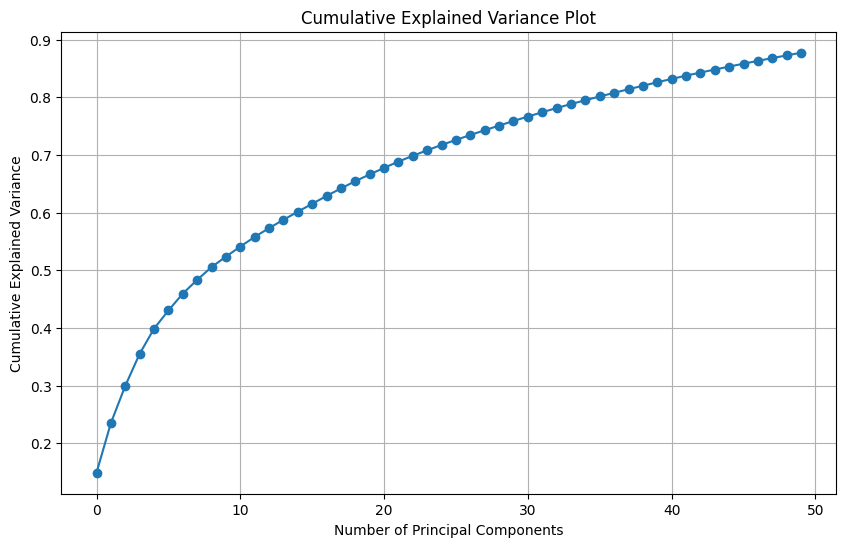

[LibSVM]Validation Metrics:
Mean Squared Error (MSE): 26946561227902.30
Mean Absolute Error (MAE): 1905235.67
R² Score: -0.09


In [ ]:
n_components = 50  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_lowdim, test_size=0.2, random_state=30)

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1, verbose=True)  # Use RBF kernel for non-linear relationships
svr.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred = svr.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred)
mae = mean_absolute_error(y_test_pca, y_pred)
r2 = r2_score(y_test_pca, y_pred)

print("Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

In [191]:
n_components = 70  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_lowdim, test_size=0.2, random_state=30)


In [196]:
total_estimators = 200
max_depth=150
rf_regressor = RandomForestRegressor(n_estimators=total_estimators, warm_start=True, random_state=30,verbose=1, max_depth = max_depth)
# Track progress
results_forest_pca = []
with tqdm(total=total_estimators, desc="Training Progress") as pbar:
    for i in range(1, total_estimators + 1):
        rf_regressor.set_params(n_estimators=i)  # Incrementally add trees
        rf_regressor.fit(X_train_pca, y_train_pca)      # Train the model
        y_val_pred = rf_regressor.predict(X_test_pca)
        val_mse = mean_squared_error(y_test_pca, y_val_pred)
        val_mae = mean_absolute_error(y_test_pca, y_val_pred)
        val_r2 = r2_score(y_test_pca, y_val_pred)
        results_forest_pca.append([val_mse,val_mae,val_r2])
        pbar.update(1)  
y_val_pred = rf_regressor.predict(X_test_pca)
val_mse = mean_squared_error(y_test_pca, y_val_pred)
val_mae = mean_absolute_error(y_test_pca, y_val_pred)
val_r2 = r2_score(y_test_pca, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"R² Score: {val_r2:.2f}")



Training Progress:  24%|██▍       | 48/200 [03:17<10:37,  4.19s/it][Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
Training Progress:  99%|█████████▉| 198/200 [16:43<00:10,  5.34s/it][Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
Training Progress: 100%|█████████▉| 199/200 [16:48<00:05,  5.12s/it][Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
Training Progress: 100%|██████████| 200/200 [16:52<00:00,  5.06s/it]
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Validation Metrics:
Mean Squared Error (MSE): 9476896062282.58
Mean Absolute Error (MAE): 1196845.88
R² Score: 0.62


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s


In [190]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1, verbose=True)  # Use RBF kernel for non-linear relationships
svr.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred = svr.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred)
mae = mean_absolute_error(y_test_pca, y_pred)
r2 = r2_score(y_test_pca, y_pred)

print("Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

[LibSVM]Validation Metrics:
Mean Squared Error (MSE): 26947893852818.21
Mean Absolute Error (MAE): 1906912.23
R² Score: -0.09


In [153]:
k_neighbors = 1
model = KNeighborsRegressor(n_neighbors=k_neighbors)

model.fit(X_pca, y_val)

y_val_pred = model.predict(X_pca)

mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Validation Metrics:
Mean Squared Error (MSE): 1309571561907.95
Mean Absolute Error (MAE): 87643.49
R² Score: 0.95


In [ ]:
y_val_pred = model.predict(X_pca)

mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X_val, y_val_pred, color='red', linewidth=2, label="Polynomial Fit")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()